<a href="https://colab.research.google.com/github/chrisliu01/network-management/blob/master/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CSCI 6706 Summer - Assignment 2 - Chris Liu - B00415613
- Note: this part is inspired by Lab 5, https://colab.research.google.com/drive/1BG2BPmFGegaMEjLIrKQ-Y589-8n0v8Zz?usp=sharing#scrollTo=W9aNNiTLfsy-


Data Preprocssing


In [0]:
from google.colab import files
uploaded = files.upload()

Saving 2020-06-09-4-02PM_00002_20200609170231_labeled.csv to 2020-06-09-4-02PM_00002_20200609170231_labeled.csv


In [0]:

# RUN ALL THE CODE BEFORE YOU START
import numpy as np
from matplotlib.pylab import plt #load plot library
import pandas as pd
import io
# indicate the output of plotting function is printed to the notebook
%matplotlib inline 

# FullMesh_y = [8.045, 20.281, 17.721, 20.281, 22.865, 32.314]
# DropAlgorithm_y = [52.004, 64.585, 86.985]
# NewDesign_y = [30.738, 61.910, 47.367, 38.983]
# reading csv file  
# df_day_one=pd.read_csv(io.BytesIO(uploaded['2020-06-07-8-05PM_00002_20200607210636_labeled.csv']))
# ###
# df_day_one.head()

# reading csv file  
# df_day_two=pd.read_csv(io.BytesIO(uploaded['2020-06-08-9-04AM_00002_20200608100431_labeled.csv']))
# ###
# df_day_two.head()

df_day_three=pd.read_csv(io.BytesIO(uploaded['2020-06-09-4-02PM_00002_20200609170231_labeled.csv']))
df_day_three.head()

# df_total = df_day_one
# df_total.append(df_day_two, ignore_index=True)
# df_total.append(df_day_three, ignore_index=True)

# df_total=pd.read_csv(io.BytesIO(uploaded['assignment2-df-total.csv']))
# df_total.head()




,StartTime,Flgs,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,TotPkts,TotBytes,State,Load,Dur,Trans,Rate,sTos,dTos,sTtl,dTtl,Label
0,10:19:25.440138,,man,0,0,NaN,0,0,0,0,STA,0,0,nan,0,nan,nan,nan,nan,NaN
1,10:19:25.440138,,man,0,0,NaN,0,0,0,0,STA,0,0,nan,0,nan,nan,nan,nan,NaN
2,17:02:29.778418,e g,tcp,192.168.0.4,54467,<?>,192.168.0.12,iscsi-target,970,266704,CON,"463,472",5,1,211,0,0,64,128,flow=normal
3,17:02:29.779180,e,tcp,192.168.0.4,51512,?>,52.96.88.178,pop3s,1,60,CON,0,0,1,0,0,nan,116,nan,flow=normal
4,17:02:29.779228,e,ip,00:11:32:b3:5a:72,NaN,->,c8:34:8e:0f:32:cb,NaN,91,4077922,INT,"7,102,738",5,1,20,nan,nan,nan,nan,flow=bot


In [0]:
df_total.columns

Index(['Proto', 'SrcAddr', 'DstAddr', 'Dport', 'TotPkts', 'TotBytes', 'Load',
       'Label'],
      dtype='object')

In [0]:
#get information of columns
df_day_one['SrcAddr'].unique()

array(['0', '192.168.0.4', '00:11:32:b3:5a:72', '192.0.12.42',
       '192.168.0.1', '192.168.0.5', '192.168.0.16', '192.168.100.3',
       '192.168.0.9', 'fe80::b7:5e1e:196b:852c', '192.168.0.12',
       '192.168.0.3'], dtype=object)

In [0]:
df_day_one.sort_values(by=['StartTime'])

,StartTime,Flgs,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,TotPkts,TotBytes,State,Load,Dur,Trans,Rate,sTos,dTos,sTtl,dTtl,Label
1103,10:20:44.758519,,man,0,0,NaN,0,0,0,0,STA,0.000000e+00,0.034744,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
2204,10:20:52.919528,,man,0,0,NaN,136,1,0,12708080,STP,0.000000e+00,8.195753,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
1105,21:06:35.725095,e g,tcp,192.168.0.4,57813,<?>,192.168.0.12,iscsi-target,1016,273888,CON,4.411601e+05,4.955335,1.0,204.829742,0.0,0.0,64.0,128.0,flow=normal
3,21:06:35.725095,e g,tcp,192.168.0.4,57813,<?>,192.168.0.12,iscsi-target,1016,273888,CON,4.411601e+05,4.955335,1.0,204.829742,0.0,0.0,64.0,128.0,flow=normal
1106,21:06:35.727711,e,ip,00:11:32:b3:5a:72,NaN,->,c8:34:8e:0f:32:cb,NaN,71,3213530,INT,5.223645e+06,4.852198,1.0,14.426452,NaN,NaN,NaN,NaN,flow=bot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,21:07:59.023482,e,tcp,192.168.0.4,57604,->,13.107.42.13,https,9,5225,CON,4.238566e+05,0.078385,1.0,102.060341,0.0,0.0,128.0,121.0,flow=normal
2203,21:07:59.023482,e,tcp,192.168.0.4,57604,->,13.107.42.13,https,9,5225,CON,4.238566e+05,0.078385,1.0,102.060341,0.0,0.0,128.0,121.0,flow=normal
0,21:21:09.916193,,man,0,0,NaN,0,0,0,0,STA,0.000000e+00,0.023956,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
1,21:21:09.916193,,man,0,0,NaN,0,0,0,0,STA,0.000000e+00,0.023956,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


In [0]:
# aggregate the records by the same source address, destination and portal number, the sum up things are total packages and total bytes
sumdf_day_one = df_day_one.groupby(['SrcAddr', 'DstAddr', 'Dport']).agg({'TotPkts': 'sum', 'TotBytes': 'sum'})
print(sumdf_day_one)

                                                    TotPkts  TotBytes
SrcAddr                 DstAddr         Dport                        
192.0.12.42             192.168.0.4     57372             2       132
192.168.0.12            192.168.0.4     0x6f02            4       372
                        224.0.0.251     mdns              2       162
192.168.0.16            192.168.0.4     61355             8      2696
192.168.0.4             13.107.21.200   https             6       366
...                                                     ...       ...
192.168.0.9             192.168.0.255   netbios-ns       12      1104
                        255.255.255.255 bootps            4      1368
192.168.100.3           239.255.255.250 1900             16      5708
fe80::b7:5e1e:196b:852c ff02::1:3       hostmon           6       590
                        ff02::fb        mdns              2       182

[149 rows x 2 columns]


In [0]:
def preprocess(df):
  # remove NA values
  df.dropna()
  # remove unnecessary columns, or the columns have too many NA vlues
  df = df.drop(['Flgs', 'Sport', 'Dir', 'State', 'StartTime', 'Dur', 'Trans', 'Rate',
        'sTos', 'dTos', 'sTtl', 'dTtl'], axis=1)
  # remove abnormal address field
  df = df[df.SrcAddr != '0']
  return df

df_day_three = preprocess(df_day_three)

In [0]:
def saveCsv(df, filename):
    df.to_csv(filename, index=False, header=True)
    from google.colab import files
    files.download(filename)

saveCsv(df_total, 'assignment2-df-total.csv')

In [0]:
# aggregate the records by the same source address, destination and portal number, the sum up things are total packages and total bytes
df_day_two = df_day_two.groupby(['SrcAddr', 'DstAddr', 'Dport']).agg({'TotPkts': 'sum', 'TotBytes': 'sum'})
print(df_day_two)

                                            TotPkts  TotBytes
SrcAddr        DstAddr        Dport                          
142.250.31.189 192.168.0.4    58427               2       161
192.0.15.98    192.168.0.4    64925               1        96
192.168.0.4    13.107.42.13   http-alt            1        66
               192.0.12.42    pop3               17      1074
               192.0.15.98    snmp                4       351
               192.168.0.12   5000               63     33539
                              5001                9      2529
                              http               44      6674
                              https              10      1467
                              iscsi-target      938    233682
                              microsoft-ds      119     21697
                              pop3                2       126
                              smtp               16      1008
                              snmp                8      1265
        

In [0]:
df_day_two

,StartTime,Flgs,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,TotPkts,TotBytes,State,Load,Dur,Trans,Rate,sTos,dTos,sTtl,dTtl,Label
0,10:08:33.921977,,man,0,0,NaN,0,0,0,0,STA,0.000000e+00,0.169119,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
1,10:08:33.921977,,man,0,0,NaN,0,0,0,0,STA,0.000000e+00,0.169119,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
2,10:04:29.957454,e g,tcp,192.168.0.4,53416,<?>,192.168.0.12,iscsi-target,904,226122,CON,4.697709e+05,3.838024,1.0,235.277328,0.0,0.0,64.0,128.0,flow=normal
3,10:04:29.957467,e,tcp,192.168.0.4,54356,<?>,192.168.0.12,microsoft-ds,7,1633,RST,1.970595e+05,0.046727,1.0,128.405411,16.0,0.0,64.0,128.0,flow=normal
4,10:04:29.957686,e,tcp,192.168.0.4,54346,?>,54.239.31.83,pop3,1,60,RST,0.000000e+00,0.000000,1.0,0.000000,0.0,NaN,225.0,NaN,flow=normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,10:04:34.871265,e,tcp,192.168.0.4,53946,<?>,192.168.0.12,5000,3,168,FIN,7.237393e+04,0.005969,1.0,335.064484,0.0,0.0,128.0,64.0,flow=normal
77,10:04:34.871803,e,tcp,192.168.0.4,54390,->,192.168.0.12,5000,5,468,CON,1.116654e+05,0.020848,1.0,191.864929,0.0,0.0,128.0,64.0,flow=normal
78,10:04:34.995502,e g,tcp,192.168.0.4,53416,<?>,192.168.0.12,iscsi-target,34,7560,CON,3.880350e+07,0.001257,1.0,26252.982422,0.0,0.0,64.0,128.0,flow=normal
79,10:04:34.995823,e,ip,00:11:32:b3:5a:72,NaN,->,c8:34:8e:0f:32:cb,NaN,14,787380,REQ,5.250549e+09,0.001114,1.0,11669.659180,NaN,NaN,NaN,NaN,flow=bot


Visualization

In [0]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import collections

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


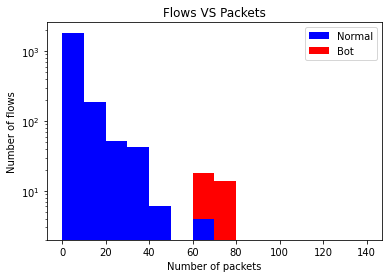

In [0]:
# Plot a histogram of flows
# Similar to rahisto
def totlePkg(df):
  plt.hist([df[df['Label']=='flow=normal']['TotPkts'], df[df['Label']=='flow=bot']['TotPkts']],log=True ,
          stacked=True, color=['blue','red'],bins = np.arange(0,150,10), label=['Normal','Bot'])
  plt.ylabel('Number of flows')
  plt.xlabel('Number of packets')
  plt.title("Flows VS Packets")
  plt.legend()
  plt.show()

totlePkg(df_total)

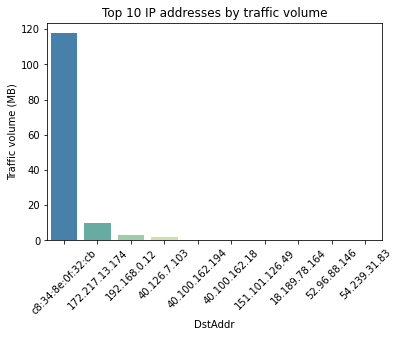

In [0]:
# source: https://meyob.github.io/blog/2017/network-trace-analysis/
# similar to rasort

def srcAddTraffic(df):
  f, ax = plt.subplots(1, 1,figsize=(6, 4))

  per_ip = df.groupby("DstAddr", as_index=False).agg({"TotBytes":[np.sum]})

  p = per_ip.sort_values(by=("TotBytes","sum"),ascending=False)[:10]
  p["TotBytes","sum"] = p["TotBytes","sum"]/1000000
  sns.barplot(p["DstAddr"], p["TotBytes","sum"],palette="Spectral_r", ax=ax)

  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
  ax.set_ylabel("Traffic volume (MB)")
  ax.set_title("Top 10 IP addresses by traffic volume")

srcAddTraffic(df_total)

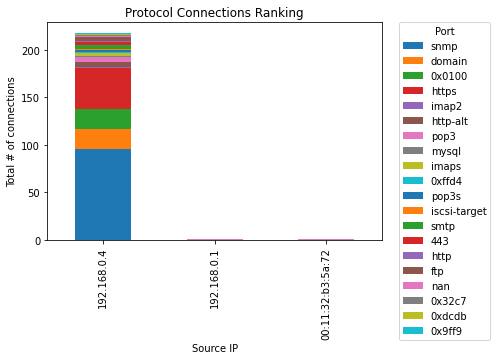

In [0]:
#source: https://anaconda.org/anaconda-enterprise/malware-traffic-analysis/notebook
# plot traffic of each source IP by port number

def box_plot_df_setup(series_a, series_b): 
    # Count up all the times that a category from series_a
    # matches up with a category from series_b. This is
    # basically a gigantic contingency table
    cont_table = collections.defaultdict(lambda : collections.Counter())
    for val_a, val_b in zip(series_a.values, series_b.values):
        cont_table[val_a][val_b] += 1
    
    # Create a dataframe
    # A dataframe with keys from series_a as the index, series_b_keys
    # as the columns and the counts as the values.
    dataframe = pd.DataFrame(cont_table.values(), index=cont_table.keys())
    dataframe.fillna(0, inplace=True)
    return dataframe

def connectRank(df):
    df1 = df.sample(frac=0.1, random_state=10)
    ax = box_plot_df_setup(df1['Dport'], df1['SrcAddr']).T.plot(kind='bar', stacked=True)
    plt.ylabel('Total # of connections')
    plt.xlabel('Source IP')
    ax.set_title("Protocol Connections Ranking")
    patches, labels = ax.get_legend_handles_labels()
    ax.legend(patches, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Port")

connectRank(df_total)

2      iscsi-target
3             pop3s
5              http
6              5000
7              5000
           ...     
612             443
613           https
614            snmp
615           https
616            snmp
Name: Dport, Length: 599, dtype: object 2      266704
3          60
5         463
6         168
7        9387
        ...  
612       959
613       430
614       189
615      4603
616       250
Name: TotBytes, Length: 599, dtype: int64
squart 2     681
3       0
5       0
6      64
7     329
       ..
612   165
613   191
614     0
615   629
616     0
Name: Load, Length: 599, dtype: float64 4      2,665
19    18,330
62        44
85     2,767
149       85
172    2,745
257    2,784
289        0
326    2,617
354        0
388    3,885
466    3,885
543    2,850
554    3,834
581        0
Name: Load, dtype: float64
scale normal 2     136
3       0
5       0
6      13
7      66
       ..
612    33
613    38
614     0
615   126
616     0
Name: Load, Length: 599, dtype: float64
sc

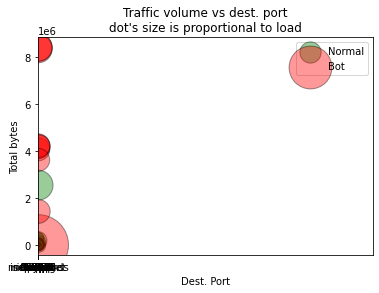

In [0]:
# source: https://github.com/eraclitux/machine-learning-netflow/blob/master/machinelearning-netflow.ipynb
# plot traffic volume vs destination port

def trafficDestination(df):
    scale_factor = 0.2
    alfa = 0.4
    plt.xlabel('Dest. Port')
    plt.ylabel('Total bytes')

    df['Dport'] = df['Dport'].astype(str)
    # df['Load'] = df['Load'].astype(int)
    # pd.options.display.float_format = '{:,.0f}'.format
    # df['Load'] = df['Load'].astype(int)
    # df['Load'] = df['Load'].astype(bytes)
    # SMTP label
    x, y = df[df['Label']=='flow=normal']['Dport'], df[df['Label']=='flow=normal']['TotBytes']
    print(x,y)
    df_normal_load = df[df['Label']=='flow=normal']['Load']
    df_bot_load = df[df['Label']=='flow=bot']['Load']
    print("squart", np.sqrt(df_normal_load), np.sqrt(df_bot_load))
    scale = scale_factor * np.sqrt(df_normal_load)
    print("scale normal", scale)
    plt.scatter(x, y, c='green', label='Normal',s=scale,
                alpha=alfa, 
                edgecolors='black',
    )

    x, y = df[df['Label']=='flow=bot']['Dport'], df[df['Label']=='flow=bot']['TotBytes']
    scale = scale_factor * np.sqrt(df_bot_load)
    print("scale bot", scale)
    plt.scatter(x, y, c='red', label='Bot',s=scale,
                alpha=alfa, 
                edgecolors='black',
    )


    plt.title('Traffic volume vs dest. port\ndot\'s size is proportional to load')

    plt.legend()
    plt.xlim([0,22000])
    plt.show()

trafficDestination(df_day_three)

Classification

In [0]:
df_total.dtypes

# df_total


Proto        object
SrcAddr      object
DstAddr      object
Dport        object
TotPkts       int64
TotBytes      int64
Load        float64
Label        object
dtype: object

In [0]:
# drop unused features and get numerical data and labels

df1 = df_total.drop(['SrcAddr', 'DstAddr', 'Dport', 'Proto'], axis=1)

# obtain the features and the label
# Get the location of label 
label_index=df1.columns.get_loc("Label")
X, y = df1.iloc[:, :label_index].astype(float).values, df1.iloc[:, label_index].values

In [0]:
X_features = pd.DataFrame(df1.iloc[:, :label_index])
print("Classification features:", X_features.columns)
y_labels = pd.DataFrame(df1.iloc[:, label_index])
print("Classification targets:", y_labels.columns)

Classification features: Index(['TotPkts', 'TotBytes', 'Load'], dtype='object')
Classification targets: Index(['Label'], dtype='object')


In [0]:
# Split the dataset into two disjoint set Train (80%) and Test (20%)
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2 )

In [0]:
print(X_train)

[[2.00000000e+00 4.19000000e+02 0.00000000e+00]
 [1.40000000e+01 5.19500000e+03 2.19190219e+05]
 [2.00000000e+00 1.48000000e+02 0.00000000e+00]
 ...
 [2.00000000e+00 1.48000000e+02 0.00000000e+00]
 [2.00000000e+00 1.79000000e+02 0.00000000e+00]
 [2.00000000e+00 1.87000000e+02 0.00000000e+00]]


In [0]:
# Train the model 
# Here, we need to train the model by providing data and corresponding labels.
# pipe_clf = Pipeline([('scl', StandardScaler()), ('clf',DecisionTreeClassifier())])

pipe_clf = Pipeline([('scl', StandardScaler()), ('clf',GaussianNB())])
pipe_clf.fit(X_train, y_train)
pred = pipe_clf.predict(X_train)
cfm=metrics.confusion_matrix(y_train, pred)
print('Train confusion matrix: \n', cfm)

Train confusion matrix: 
 [[  26   13]
 [   4 1717]]


In [0]:
	# Test and evaluation
	pred = pipe_clf.predict(X_test)

	score = metrics.accuracy_score(y_test, pred)
	print("accuracy:   %0.3f" % score)

	print("test confusion matrix:")
	cfm=metrics.confusion_matrix(y_test, pred)
	print(cfm)

	print("classification report:")
	classificationReport = classification_report(y_true=y_test, y_pred=pred)
	print (classificationReport)

accuracy:   0.993
test confusion matrix:
[[  8   3]
 [  0 429]]
classification report:
              precision    recall  f1-score   support

    flow=bot       1.00      0.73      0.84        11
 flow=normal       0.99      1.00      1.00       429

    accuracy                           0.99       440
   macro avg       1.00      0.86      0.92       440
weighted avg       0.99      0.99      0.99       440

